# Machine Intelligence for Finance
**Coursework – Academic Year 2025–2026**

This Jupyter Notebook accompanies the coursework submission for the *Machine Intelligence for Finance* module (Academic Year 2025–2026). It contains the Python implementations required to reproduce the figures, tables, and results presented in the corresponding PDF report.

The analyses focus on the statistical properties of stock price and return time series, including log-price transformations, sliding-window statistics, and return-based representations commonly used in financial modelling. All simulations are implemented in **Python 3** and the notebook is structured to mirror the organisation and numbering of the coursework handout.


## Section 1 - Regression Methods
### 1.1 Processing stock price data in Python

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Question 1.1.1

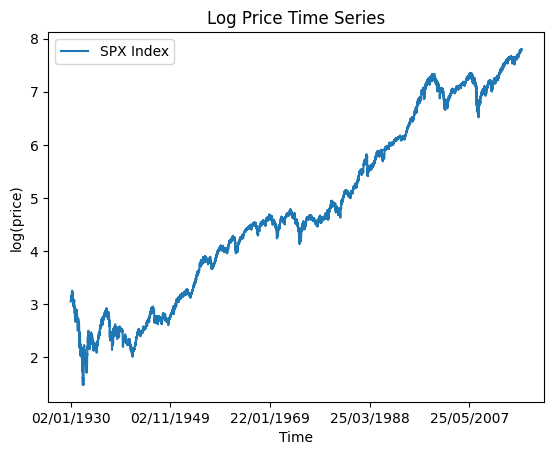

In [9]:
px = pd.read_csv("priceData.csv", index_col=0, parse_dates=True)

# Log Price
logpx = np.log(px)

# Plotting graph
ax = logpx.plot(title="Log Price Time Series")
ax.set_xlabel("Time")
ax.set_ylabel("log(price)")
plt.show()


#### Question 1.1.2


<Figure size 1400x500 with 0 Axes>

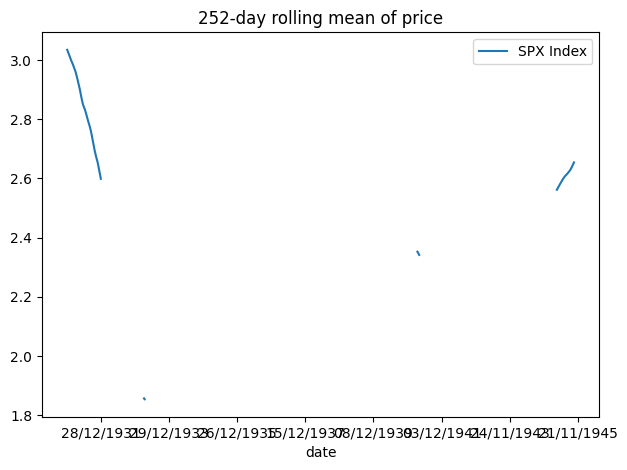

<Figure size 1400x500 with 0 Axes>

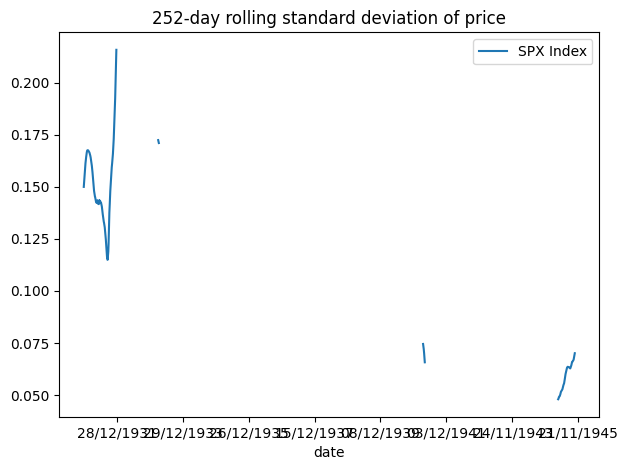

In [10]:
# Rolling mean
plt.figure(figsize=(14,5))
logpx.rolling(252).mean().plot()
plt.title("252-day rolling mean of price")
plt.tight_layout()
plt.show()

# Rolling std
plt.figure(figsize=(14,5))
logpx.rolling(252).std().plot()
plt.title("252-day rolling standard deviation of price")
plt.tight_layout()
plt.show()

Missing observations in the time series lead to undefined values in the sliding-window statistics. For visualisation purposes, these are handled via interpolation, which estimates missing values using neighbouring observations and enables continuous rolling-window calculations. This does not affect the conclusions regarding stationarity.

<Figure size 640x480 with 0 Axes>

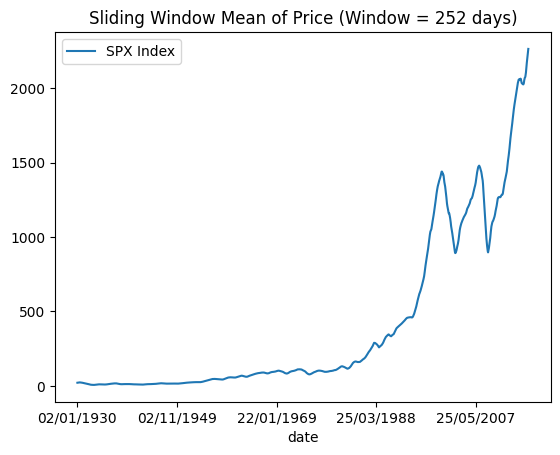

<Figure size 640x480 with 0 Axes>

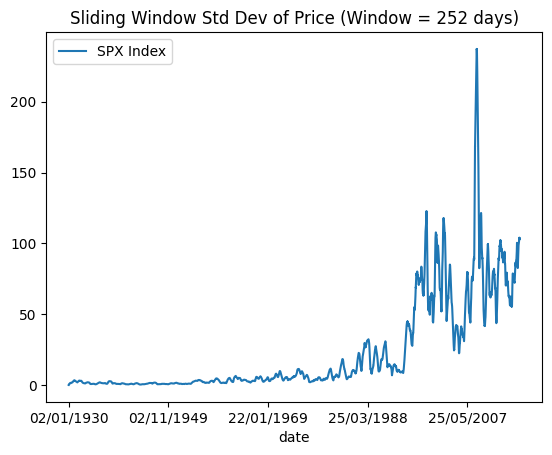

<Figure size 640x480 with 0 Axes>

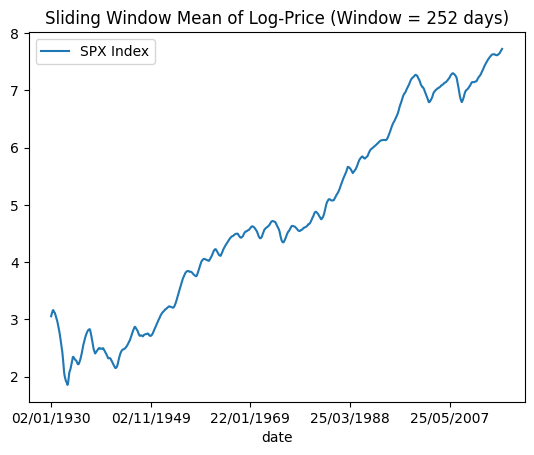

<Figure size 640x480 with 0 Axes>

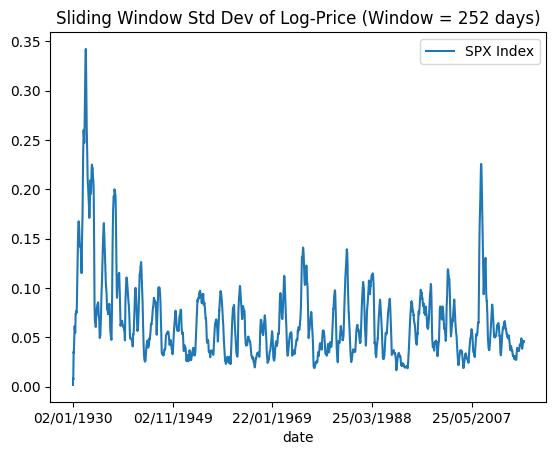

In [11]:

# Sliding mean for prices
plt.figure()
px.rolling(252, min_periods=1).mean().plot()
plt.title('Sliding Window Mean of Price (Window = 252 days)')
plt.show()

# Sliding standard deviation for prices
plt.figure()
px.rolling(252, min_periods=1).std().plot()
plt.title('Sliding Window Std Dev of Price (Window = 252 days)')
plt.show()

# Sliding mean for log-prices
plt.figure()
logpx.rolling(252, min_periods=1).mean().plot()
plt.title('Sliding Window Mean of Log-Price (Window = 252 days)')
plt.show()

# Sliding standard deviation for log-prices
plt.figure()
logpx.rolling(252, min_periods=1).std().plot()
plt.title('Sliding Window Std Dev of Log-Price (Window = 252 days)')
plt.show()



The rolling mean and standard deviation of both the price and log-price series vary over time, indicating non-constant first- and second-order statistics. This demonstrates that neither series is stationary. While the log transformation reduces the scale of fluctuations, it does not eliminate the underlying non-stationary behaviour.The sliding-window statistics reveal clear evidence of non-stationarity in both the price and log-price time series.

For the price series, the 252-day rolling mean exhibits a pronounced upward trend over time rather than fluctuating around a constant level, indicating a non-constant first-order moment. In addition, the rolling standard deviation varies substantially across the sample, with periods of elevated and reduced volatility, demonstrating time-varying second-order statistics.

A similar behaviour is observed for the log-price series. Although the logarithmic transformation compresses the scale of fluctuations, the rolling mean still displays a persistent upward trend, and the rolling standard deviation remains time-dependent.

Consequently, neither the price nor the log-price series can be considered stationary, as both the mean and variance change over time. The log transformation improves numerical stability but does not remove the underlying non-stationarity.

#### Question 1.1.3


/var/folders/tk/ykrs7y753dn8dmkvm_bk8yzw0000gn/T/ipykernel_97355/1159489027.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simpret = px.pct_change()


<Figure size 1400x500 with 0 Axes>

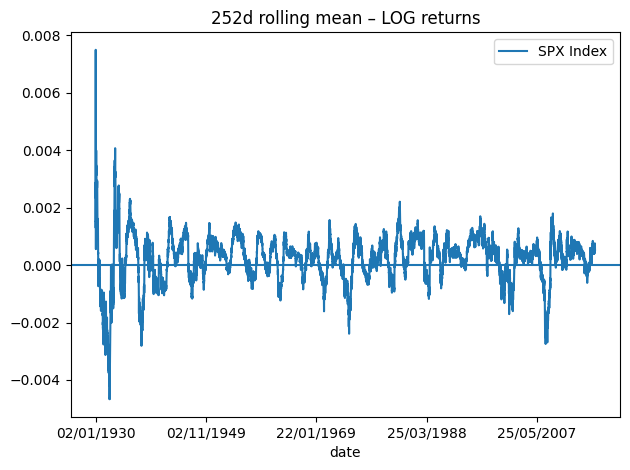

<Figure size 1400x500 with 0 Axes>

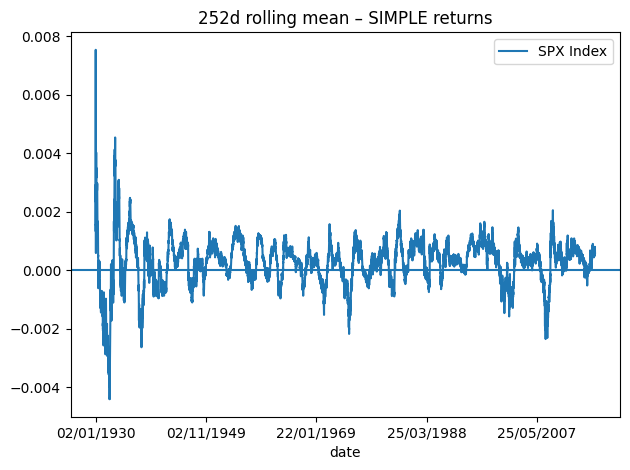

<Figure size 1400x500 with 0 Axes>

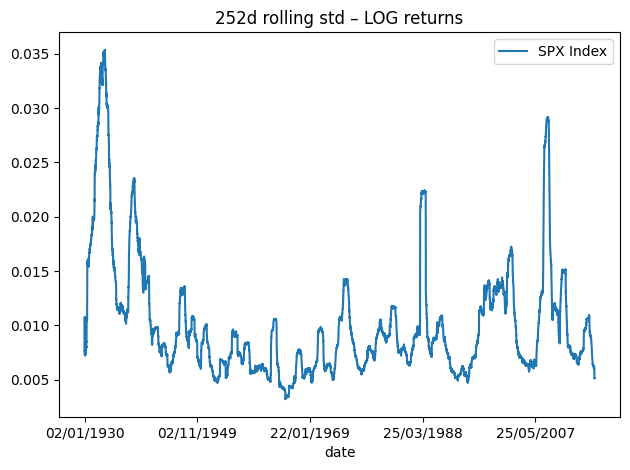

<Figure size 1400x500 with 0 Axes>

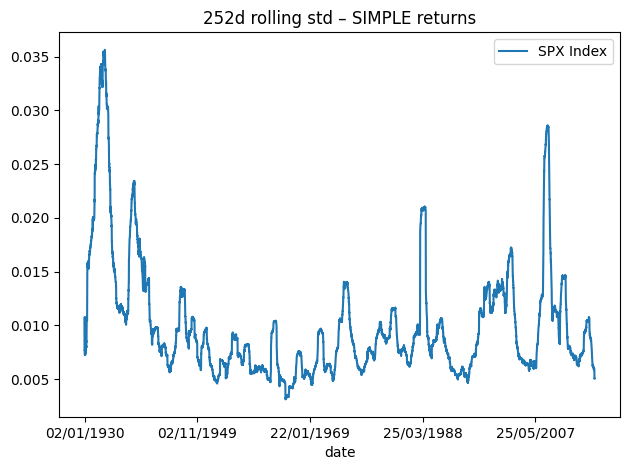

In [12]:
# log returns
logret = logpx.diff()

# simple returns
simpret = px.pct_change()

# Rolling mean
plt.figure(figsize=(14,5))
logret.rolling(252, min_periods=1).mean().plot(title="252d rolling mean – LOG returns")
plt.axhline(0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
simpret.rolling(252, min_periods=1).mean().plot(title="252d rolling mean – SIMPLE returns")
plt.axhline(0)
plt.tight_layout()
plt.show()


# Rolling std
plt.figure(figsize=(14,5))
logret.rolling(252, min_periods=1).std().plot(title="252d rolling std – LOG returns")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,5))
simpret.rolling(252, min_periods=1).std().plot(title="252d rolling std – SIMPLE returns")
plt.tight_layout()
plt.show()


The rolling mean of both simple and logarithmic returns is approximately constant and close to zero, indicating stationarity in the first-order moment. However, the rolling variance still varies over time, reflecting volatility clustering. Consequently, while returns are closer to weak stationarity than prices, they are not strictly stationary.

#### Question 1.1.4

In [13]:
from scipy import stats

# Test log returns for normality
print("LOG RETURNS - Jarque-Bera Test")
for col in logret.columns:
    jb_stat, jb_pvalue = stats.jarque_bera(logret[col].dropna())
    print(f"{col}: JB={jb_stat:.4f}, p-value={jb_pvalue:.6f}")
    if jb_pvalue < 0.05:
        print(f"REJECT normality (p < 0.05)") 
    else:
        print(f"Cannot reject normality")
    print()

# Test simple returns for normality
print("\nSIMPLE RETURNS - Jarque-Bera Test")
for col in simpret.columns:
    jb_stat, jb_pvalue = stats.jarque_bera(simpret[col].dropna())
    print(f"{col}: JB={jb_stat:.4f}, p-value={jb_pvalue:.6f}")
    if jb_pvalue < 0.05:
        print(f"REJECT normality (p < 0.05)") 
    else:
        print(f"Cannot reject normality")
    print()

LOG RETURNS - Jarque-Bera Test
SPX Index: JB=311807.2705, p-value=0.000000
REJECT normality (p < 0.05)


SIMPLE RETURNS - Jarque-Bera Test
SPX Index: JB=284160.6773, p-value=0.000000
REJECT normality (p < 0.05)



The Jarque–Bera test rejects the null hypothesis of normality for both simple and log returns, indicating that neither series follows a Gaussian distribution. Despite this, log returns are preferable for signal processing as they are additive over time and symmetric around zero. For small price changes, log returns are approximately Gaussian and arise naturally under the geometric Brownian motion assumption. The rejection of normality reflects limitations of the Gaussian modelling assumption rather than a failure of the log-return framework itself.

### 1.2 ARMA vs ARIMA Models For Financial Evaluation

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import copy

#### Question 1.2.1